In [ ]:
 import numpy as np
 import tensorflow as tf
 import matplotlib as mpl
 from keras import backend
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import decode_predictions, preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls "/content/gdrive/My Drive/data/train/flooding"

frame0.jpg    frame33.jpg  frame89.jpg	  image_157.jpg  image_34.jpg
frame100.jpg  frame34.jpg  frame8.jpg	  image_158.jpg  image_35.jpg
frame101.jpg  frame35.jpg  frame90.jpg	  image_159.jpg  image_36.jpg
frame102.jpg  frame36.jpg  frame91.jpg	  image_161.jpg  image_37.jpg
frame103.jpg  frame37.jpg  frame92.jpg	  image_162.jpg  image_38.jpg
frame104.jpg  frame38.jpg  frame93.jpg	  image_163.jpg  image_39.jpg
frame105.jpg  frame39.jpg  frame94.jpg	  image_164.jpg  image_3.jpg
frame106.jpg  frame3.jpg   frame95.jpg	  image_165.jpg  image_40.jpg
frame107.jpg  frame40.jpg  frame96.jpg	  image_166.jpg  image_41.jpg
frame108.jpg  frame41.jpg  frame97.jpg	  image_168.jpg  image_42.jpg
frame109.jpg  frame42.jpg  frame98.jpg	  image_169.jpg  image_43.jpg
frame10.jpg   frame43.jpg  frame99.jpg	  image_16.jpg	 image_45.jpg
frame110.jpg  frame44.jpg  frame9.jpg	  image_170.jpg  image_46.jpg
frame111.jpg  frame45.jpg  image_100.jpg  image_171.jpg  image_47.jpg
frame112.jpg  frame46.jpg  image_101.

In [ ]:
labels = ['Flooding', 'No Flooding']
train_path = "/content/gdrive/My Drive/data/train"
valid_path = "/content/gdrive/My Drive/data/valid"
test_path = "/content/gdrive/My Drive/data/test"

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 456 images belonging to 2 classes.
Found 81 images belonging to 2 classes.
Found 71 images belonging to 2 classes.


In [ ]:
#loading the pre-trained lightweight mobilenet image classifier
mobile = tf.keras.applications.mobilenet.MobileNet()


In [ ]:
x = mobile.layers[-6].output

In [ ]:
output = Dense(units=2, activation='softmax')(x)


In [ ]:
model = Model(inputs=mobile.input, outputs=output)

In [ ]:
#Freeze weights of all the layers except the last five layers in our new model.
#TRAINING ONLY THE LAST FIVE LAYERS OF THE MODEL
for layer in model.layers[:-23]:
    layer.trainable = False

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
#compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Train the Model

model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=15,
          verbose=2
)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


46/46 - 69s - loss: 0.2765 - accuracy: 0.8750 - val_loss: 0.8510 - val_accuracy: 0.7654
Epoch 2/15
46/46 - 35s - loss: 0.0512 - accuracy: 0.9803 - val_loss: 0.2830 - val_accuracy: 0.9012
Epoch 3/15
46/46 - 35s - loss: 0.0301 - accuracy: 0.9934 - val_loss: 0.3429 - val_accuracy: 0.8765
Epoch 4/15
46/46 - 36s - loss: 0.0354 - accuracy: 0.9912 - val_loss: 0.1060 - val_accuracy: 0.9753
Epoch 5/15
46/46 - 35s - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.1197 - val_accuracy: 0.9630
Epoch 6/15
46/46 - 36s - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0882 - val_accuracy: 0.9753
Epoch 7/15
46/46 - 35s - loss: 0.0084 - accuracy: 0.9978 - val_loss: 0.2684 - val_accuracy: 0.9012
Epoch 8/15
46/46 - 36s - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.1198 - val_accuracy: 0.9630
Epoch 9/15
46/46 - 35s - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.1210 - val_accuracy: 0.9630
Epoch 10/15
46/46 - 35s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.1005 - val_accuracy: 0.9630
Epoch 11/15
46/46 - 

In [ ]:
model.save("fine_tuned_flood_detection_model")

INFO:tensorflow:Assets written to: fine_tuned_flood_detection_model/assets


In [ ]:
#make predictions and plot confusion matrix to look how well our model performed in classifying 
#flooding amd no flooding images 
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
precision = precision_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
accuracy = accuracy_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
      for j in range (cm.shape[1]):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
print('Precision: ', precision)

print('Accuracy: ', accuracy)


Precision:  0.9032258064516129
Accuracy:  0.9577464788732394


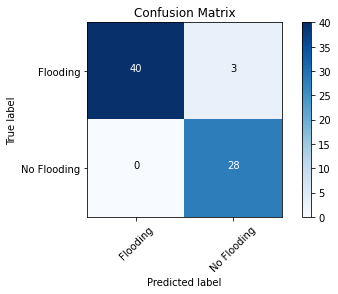

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
      for j in range (cm.shape[1]):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
test_batches.class_indices
cm_plot_labels = ['Flooding','No Flooding']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
def preprocess_image(file):
    img_path = "/content/gdrive/My Drive/data/evaluate/"
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

preprocessed_image = preprocess_image("frame56.jpg")
predictions = model.predict(preprocessed_image)

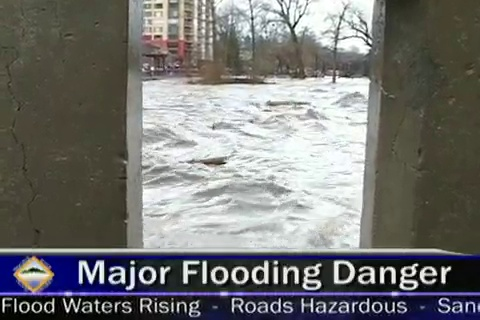

In [ ]:
from IPython.display import Image
Image(filename="/content/gdrive/My Drive/data/evaluate/frame56.jpg", width=300,height=200)


In [ ]:
predictions

array([[0.06602978, 0.9339703 ]], dtype=float32)

In [ ]:
result = np.argmax(predictions)

In [ ]:
labels[result]

'No Flooding'

In [ ]:
import cv2

In [ ]:
vidap = cv2.VideoCapture('https://www.youtube.com/watch?v=EYqUd6WJIsI')

In [ ]:
success,image = vidap.read()
count = 0
while success:
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

In [ ]:
image

In [ ]:
success

False

In [ ]:
'''
Using OpenCV takes a mp4 video and produces a number of images.

Requirements
----
You require OpenCV 3.2 to be installed.

Run
----
Open the main.py and edit the path to the video. Then run:
$ python main.py

Which will produce a folder called data with the images. There will be 2000+ images for example.mp4.
'''
import cv2
import numpy as np
import os

# Playing video from file:
cap = cv2.VideoCapture('example.mp4')

try:
    if not os.path.exists('data'):
        os.makedirs('data')
except OSError:
    print ('Error: Creating directory of data')

currentFrame = 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Saves image of the current frame in jpg file
    name = './data/frame' + str(currentFrame) + '.jpg'
    print ('Creating...' + name)
    cv2.imwrite(name, frame)

    # To stop duplicate images
    currentFrame += 1

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()